In [2]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import pandas as pd

In [32]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)  

def correlation(x, y):
    x_in_standard_units = standard_units(x)
    y_in_standard_units = standard_units(y)
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return sum(x_in_standard_units * y_in_standard_units)/(len(x)-1)

# This function generates a scatter plot with a correlation approximately r
def r_scatter(r):
    plots.figure(figsize=(5,5))
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)



In [3]:
housing_df=pd.read_csv("Housing.csv")

housing_df.head(5)

,floor_size,bed_room_count,built_year,sold_date,sold_price,room_count,garage_size,parking_lot
0,2068,3,2003,Aug2015,195500,6,768,3
1,3372,3,1999,Dec2015,385000,6,480,2
2,3130,3,1999,Jan2017,188000,7,400,2
3,3991,3,1999,Nov2014,375000,8,400,2
4,1450,2,1999,Jan2015,136000,7,200,1


### Numerical Optimization ###

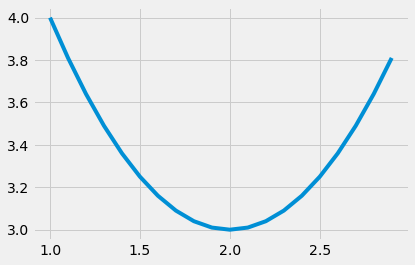

In [4]:
x = np.arange(1, 3, 0.1)
y = (x-2)**2 + 3
plots.plot(x,y);

In [5]:
def f(x):
    return ((x-2)**2) + 3

In [6]:
minimize(f)

1.9999999946252267

In [ ]:
minimize()

## Best Line(s) ##

Option 1 - least squares (mean squared error):
$$MSE=\frac{1}{n}\sum e_i^2$$

Option 2 - mean absolute errors:
$$MAE=\frac{1}{n}\sum |e_i|$$

Option 3 - remove the largest residual to allow for one outlier (robust squared error)
$$RSE=\sum e_i^2-\max (e_i^2)$$

In [8]:
def housing_mse(any_slope, any_intercept):
    x = housing_df['floor_size']
    y = housing_df['sold_price']
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) 

In [9]:
housing_mse(50,1000)

22369781863.207546

In [10]:
housing_mse(90,10000)

4760889900.943397

In [11]:
minimize(housing_mse)

array([   94.6602687 , 25181.18907815])

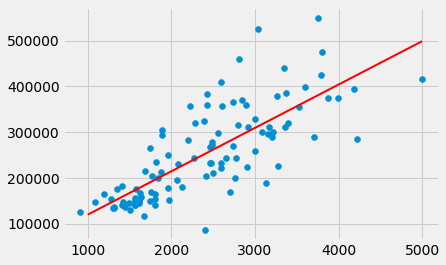

In [14]:
plots.scatter(housing_df['floor_size'],housing_df['sold_price'])
xlims = np.array([1000, 5000])
plots.plot(xlims, 94.66 * xlims + 25181.2, lw=2,color='red');

In [15]:
def housing_mae(any_slope, any_intercept):
    x = housing_df['floor_size']
    y = housing_df['sold_price']
    estimate = any_slope*x + any_intercept
    return (np.mean(abs(y - estimate))) 

In [16]:
minimize(housing_mae)

array([   93.25631213, 12033.79941472])

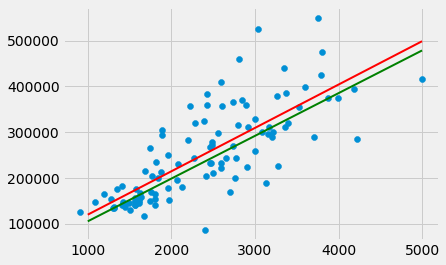

In [17]:
plots.scatter(housing_df['floor_size'],housing_df['sold_price'])
xlims = np.array([1000, 5000])
plots.plot(xlims, 94.66 * xlims + 25181.2, lw=2,color='red')
plots.plot(xlims, 93.26 * xlims + 12033.8, lw=2,color='green');

In [18]:
def housing_rse(any_slope, any_intercept):
    x = housing_df['floor_size']
    y = housing_df['sold_price']
    estimate = any_slope*x + any_intercept
    return (np.sum((y - estimate) ** 2)-np.max((y - estimate) ** 2)) 

In [19]:
minimize(housing_rse)

array([   89.70182598, 35724.54691534])

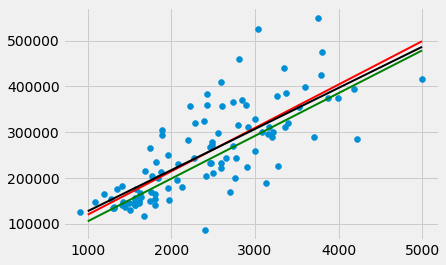

In [20]:
plots.scatter(housing_df['floor_size'],housing_df['sold_price'])
xlims = np.array([1000, 5000])
plots.plot(xlims, 94.66 * xlims + 25181.2, lw=2,color='red')
plots.plot(xlims, 93.26 * xlims + 12033.8, lw=2,color='green')
plots.plot(xlims, 89.70 * xlims + 37724.6, lw=2,color='black');


## Functions that will implement these for any x and y

In [21]:
def line_mse(x,y):
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    def mse(any_slope, any_intercept):
        estimate = any_slope*x + any_intercept
        return (np.mean((y - estimate) ** 2)) 
    return minimize(mse) 

line_mse(housing_df['floor_size'],housing_df['sold_price'])

array([   94.6602687 , 25181.18907815])

In [22]:
def line_mae(x,y):
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    def mae(any_slope, any_intercept):
        estimate = any_slope*x + any_intercept
        return (np.mean(abs(y - estimate))) 
    return minimize(mae) 

def line_rse(x,y):
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    def rse(any_slope, any_intercept):
        estimate = any_slope*x + any_intercept
        return (np.sum((y - estimate) ** 2)-np.max((y - estimate) ** 2)) 
    return minimize(rse) 

line_rse(housing_df['floor_size'],housing_df['sold_price'])

array([   89.70182598, 35724.54691534])

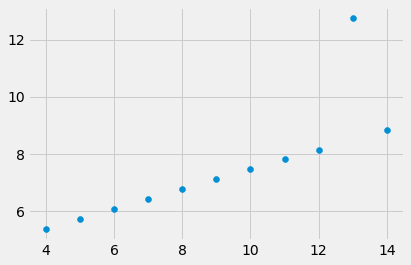

In [23]:
## this is the Dataset 3 (toy example) from Lecture 1
x3=make_array(10,8,13,9,11,14,6,4,12,7,5)
y3=make_array(7.46,6.77,12.76,7.11,7.81,8.84,6.08,5.36,8.15,6.42,5.73)
plots.scatter(x3,y3);


In [24]:
line_mse(x3,y3)

array([0.50181819, 2.98272724])

In [25]:
line_rse(x3,y3)

array([0.33783502, 4.10633787])

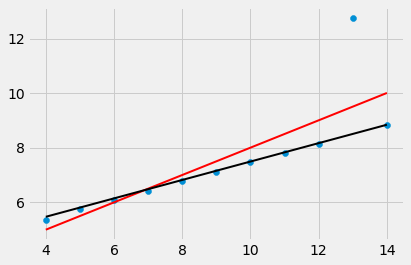

In [26]:
plots.scatter(x3,y3)
xlims = np.array([4,14])
plots.plot(xlims, 0.502 * xlims + 2.98, lw=2,color='red')
plots.plot(xlims, 0.338 * xlims + 4.11, lw=2,color='black');


## Galton Height Data

Sir Francis Galton collected data from more than 900 children recording, among other things, their heights and the heights of their parents.

He “transmuted” the heights of the girls and women in his data set, multiplying these heights by 1.08 and then formed a table of the heights of children versus the heights of their mid-parents (the average height of the father and transmuted mother)

Any guesses on what the fitted line should look like?

In [27]:
galton_df=pd.read_csv("galton.csv")

galton_df.head(10)

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5
5,2,75.5,66.5,73.66,4,2,male,72.5
6,2,75.5,66.5,73.66,4,3,female,65.5
7,2,75.5,66.5,73.66,4,4,female,65.5
8,3,75.0,64.0,72.06,2,1,male,71.0
9,3,75.0,64.0,72.06,2,2,female,68.0


In [28]:
line_mse(galton_df['midparentHeight'],galton_df['childHeight'])

array([0.96399942, 0.03064211])

In [29]:
line_mae(galton_df['midparentHeight'],galton_df['childHeight'])

array([0.9606219, 0.1407247])

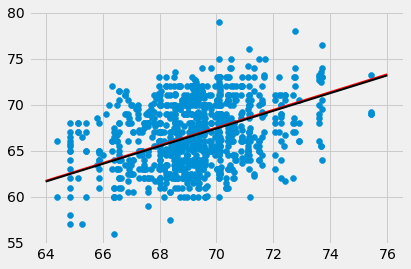

In [30]:
# the MSE and MAE lines
plots.scatter(galton_df['midparentHeight'],galton_df['childHeight'])
xlims = np.array([64,76])
plots.plot(xlims, 0.964 * xlims + 0.03, lw=2,color='red')
plots.plot(xlims, 0.961 * xlims + 0.14, lw=2,color='black');

In [33]:
# the regression (least squares) line on standard units
line_mse(standard_units(galton_df['midparentHeight']),standard_units(galton_df['childHeight']))

array([0.32094989, 0.        ])

In [34]:
correlation(galton_df['midparentHeight'],galton_df['childHeight'])

0.32094989606395896

### Assymetry

In [ ]:
# Simulated data with correlation r
r = 0.5
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo

line_mse(x_demo,y_demo)

In [ ]:
plots.figure(figsize=(7,7))
plots.xlim(-4, 4)
plots.ylim(-4, 4)
plots.scatter(x_demo, y_demo, s=10)
plots.plot([-4,4],[-4,4], color='red', lw=2)
xlims = np.array([-4,4])
plots.plot(xlims, 0.5 * xlims + 0.0, lw=2,color='black')
plots.xlabel('x in standard units')
plots.ylabel('y in standard units');